#Python Workshop: Matplotlib
<hr>

Based on:

This [git](https://github.com/zhiyzuo/python-tutorial) of Zhiya Zuo

<hr>


In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig_size = (10, 10)



## Introduction
Visualization is one of the most important things of data analysis. Besides just producing ___readable___ plots, we should make an effort to improve the overall attractiveness of the plots. `matplotlib` is a powerful package for ___Python___ users. Let's start with an example.
### Anatomy of a Figure
Before we go deeper, let's take a look at the structure of a figure in `matplotlib`:

<img width=700 src="https://matplotlib.org/_images/anatomy1.png">

As you can see, we have done things for many of the elements. There's no need to memorize them, though. We can always Google and find information on specific parts that we want to update.
## Line plot
First we generate sample data



In [2]:
X_arr = np.arange(10)
Y_arr = 3*X_arr + 2 + np.random.random(size=X_arr.size) # linear with some noise
print(X_arr)
print(Y_arr)



[0 1 2 3 4 5 6 7 8 9]
[ 2.54295015  5.91082685  8.80589265 11.28972492 14.30042437 17.88788983
 20.46520304 23.60088545 26.89516822 29.09150422]


To plot a simple scatter plot, we can use `plt.scatter()` function



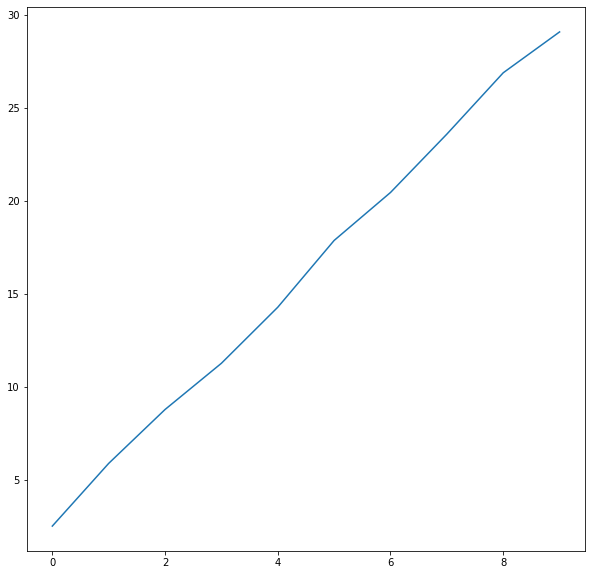

In [3]:
plt.figure(figsize=fig_size)
plt.plot(X_arr, Y_arr)



## Scatter plot



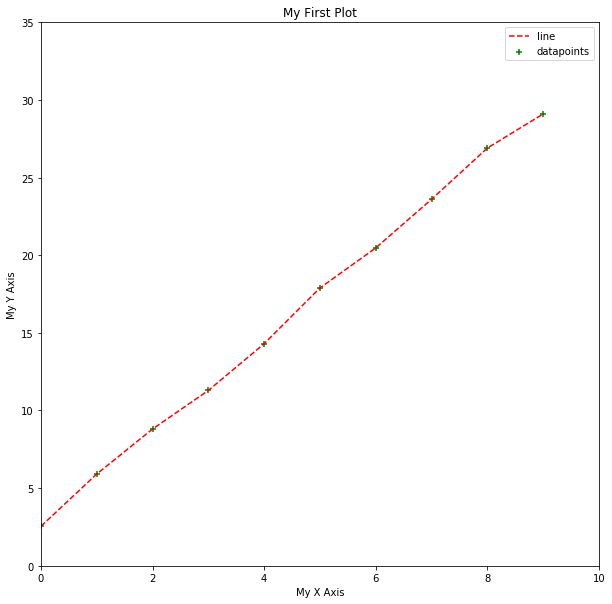

In [4]:
plt.figure(figsize=fig_size)
# Use `+` as marker; color set as `g` (green); size proportion to Y values
plt.scatter(X_arr, Y_arr, marker='+', c='g') 
# How about adding a line to it? Let's use `plt.plot()`
# set line style to dashed; color as `r` (red) 
plt.plot(X_arr, Y_arr,'--r')
# set x/y axis limits: first two are xlow and xhigh; last two are ylow and yhigh
plt.axis([0, 10, 0, 35])
# set x/y labels
plt.xlabel('My X Axis')
plt.ylabel('My Y Axis')
# set title
plt.title('My First Plot')
plt.legend(['line','datapoints'])



## Coding style
Another possible way to work with figures in `matplotlib`:



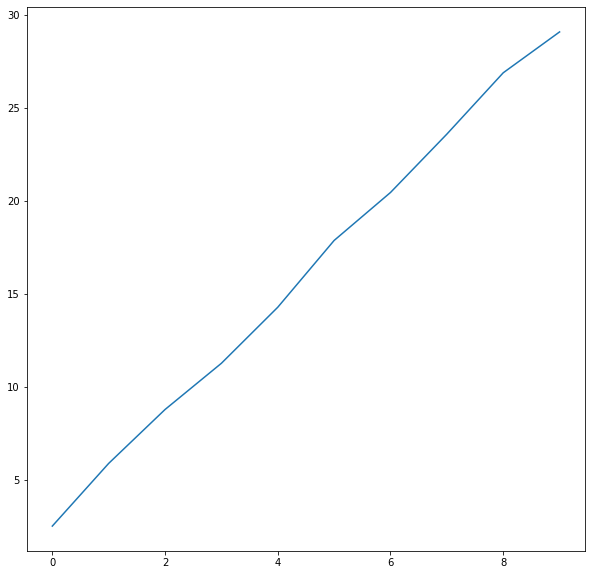

In [5]:
# `plt.subplots()` returns a figure object (which is the whole thing as shown above)
# and `axes` that control specific plots in the figure.
# Here our "subplots" layout is by default 1 row and 1 col and therefore 1 plot
fig, ax = plt.subplots(figsize=fig_size)


# plot should be done on the `axis`: ax
ax.plot(X_arr, Y_arr)



Applying what we did earlier:



Text(0.5, 1.0, 'My First Plot')

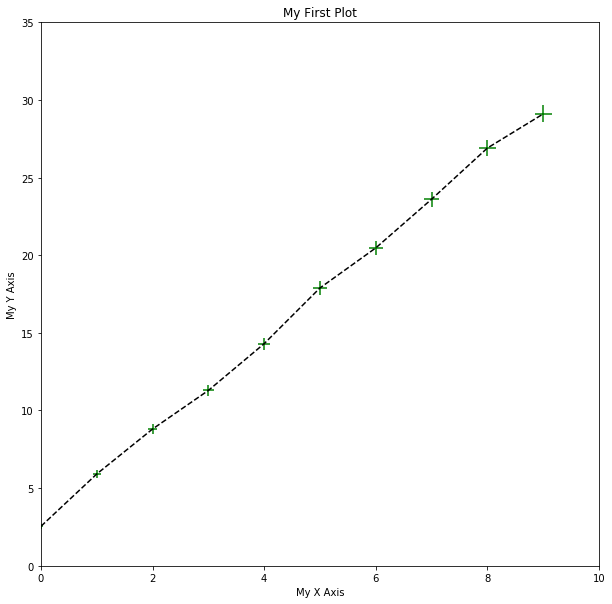

In [6]:
fig, ax = plt.subplots(figsize=fig_size)
# What we just did, applying to `ax`
ax.scatter(X_arr, Y_arr, marker='+', c='g', s=Y_arr*10) 
ax.plot(X_arr, Y_arr, linestyle='dashed', color='k')
ax.axis([0, 10, 0, 35])
ax.set_xlabel('My X Axis')
ax.set_ylabel('My Y Axis')
ax.set_title('My First Plot')



This is especially useful when handling multiple plots in one figure.



Text(0.5, 0.98, 'my subplots')

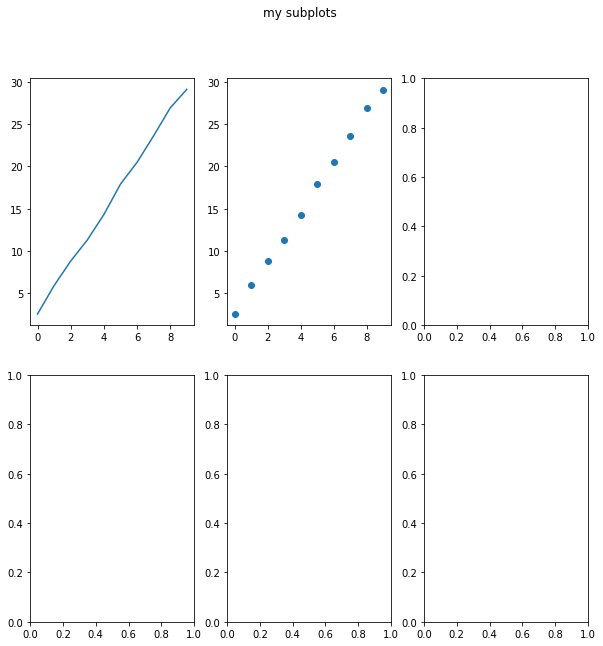

In [7]:
# Now the returned `ax_arr` would be np array with a shape a 2x3
fig, ax_arr = plt.subplots(2,3,figsize=fig_size)
ax_arr[0,0].plot(X_arr, Y_arr)
ax_arr[0,1].scatter(X_arr, Y_arr)
fig.suptitle("my subplots")



## Histogram
Let's use a Gaussian distribution for illustration



In [8]:
mu, sigma = 15, 1
gaussian_arr = np.random.normal(mu, sigma, size=10000)
np.mean(gaussian_arr), np.std(gaussian_arr, ddof=1)




(14.986906916977404, 0.9822626826908463)

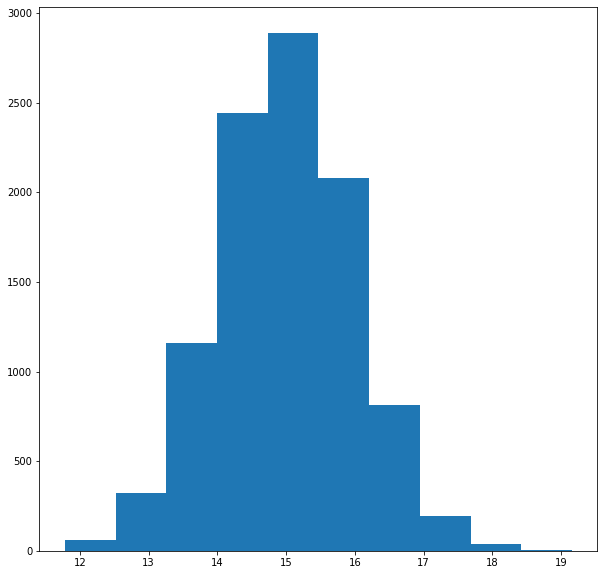

In [9]:
fig, ax = plt.subplots(figsize=fig_size)
# `hist()` will return something but we usually do not need.
freq_arr, bin_arr, _ = ax.hist(gaussian_arr)



We can actually customize and make it prettier



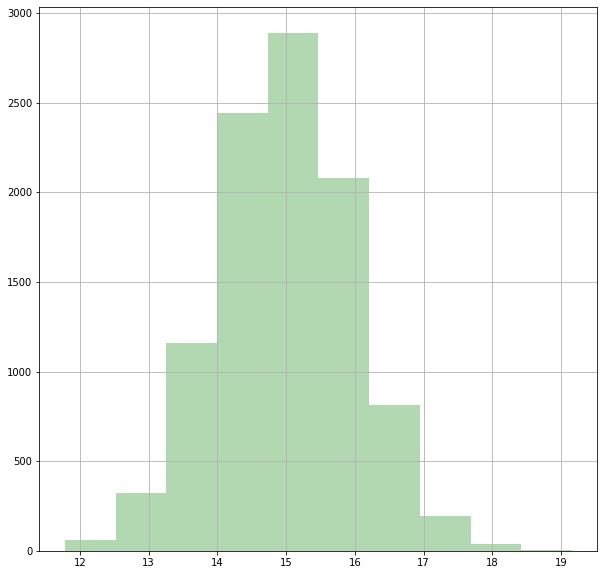

In [10]:
fig, ax = plt.subplots(figsize=fig_size)
# Facecolor set to green; transparency (`alpha`) level: 30%
freq_arr, bin_arr, _ = ax.hist(gaussian_arr, facecolor='g', alpha=0.3)
# Add grid
ax.grid()



##3D plots



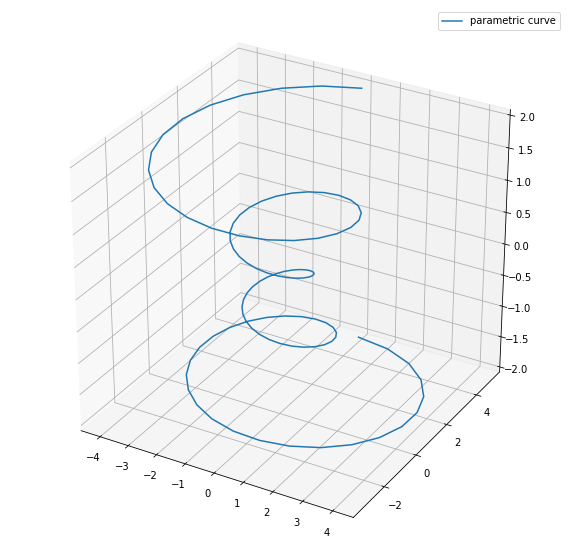

In [11]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=fig_size)
ax = fig.gca(projection='3d') # get current axis
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()



##Note on IDE plotting
In regular IDE plotting, after each plot one should put


```
plt.show()
```
to show the pop-up plot window in which one can interact with the plots (zoom, rotate, etc.), and this will stop the run of your program until closed.

A way to overcome this is running:


```
plt.show(block=False)
```
but then when the script completes, all figures are closed...

My preferred solution is running with `block=False` to all figures except the last one.




